In [10]:
!pip install pydot

  Using cached pydot-4.0.1-py3-none-any.whl.metadata (11 kB)
Using cached pydot-4.0.1-py3-none-any.whl (37 kB)
   ---------------------------------------- 0.0/113.9 kB ? eta -:--:--
   ---------- ----------------------------- 30.7/113.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 113.9/113.9 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9


In [12]:
!pip install graphviz

   ---------------------------------------- 0.0/47.3 kB ? eta -:--:--
   ---------------------------------------- 47.3/47.3 kB 1.2 MB/s eta 0:00:00


In [14]:
!pip install pydot graphviz

Path from A to E: ['A', 'B', 'E']


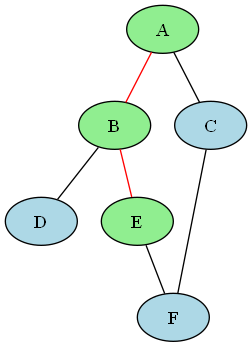

Graph saved as dfs_path.png


In [18]:
import os
import pydot
from IPython.display import Image, display
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz"
def dfs(graph, start, goal, path=None):
    if path is None:
        path = []
    path.append(start)
    if start == goal:
        return path.copy()
    for neighbor in graph.get(start, []):
        if neighbor not in path:
            result = dfs(graph, neighbor, goal, path)
            if result is not None:
                return result
    path.pop()
    return None

graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}
graph_pydot = pydot.Dot(graph_type='graph') 

start_node = 'A'
goal_node = 'E'

if start_node in graph and goal_node in graph:
    path = dfs(graph, start_node, goal_node)

    if path:
        print(f"Path from {start_node} to {goal_node}: {path}")
        path_edges = set()
        for i in range(len(path) - 1):
            path_edges.add((path[i], path[i + 1]))
        for node in graph:
            fillcolor = 'lightgreen' if node in path else 'lightblue'
            graph_pydot.add_node(pydot.Node(node, style="filled", fillcolor=fillcolor))
            for neighbor in graph[node]:
                color = 'red' if (node, neighbor) in path_edges else 'black'
                graph_pydot.add_edge(pydot.Edge(node, neighbor, color=color))
        image = Image(graph_pydot.create_png())
        display(image)
        graph_pydot.write_png("dfs_path.png")
        print("Graph saved as dfs_path.png")

    else:
        print(f"No path found from {start_node} to {goal_node}")
else:
    print("Start or goal node not found in the graph.")
